### **1. Problem Scope**

#### **1.1. Context**
We are a cloud based business offers subscription-based products. We generates revenue through subscription to use our products. The business is trying to understand scenarios surrounding subscription.   
The main decision maker for this project is the product manager. The project will take 3 days after identifying key milestones to deliver.

#### **1.2. Needs**
Our users choose to subscribe to use our products. We don't understand why some of them choose to subscribe after trying the product and why some choose not to subscribe. 
Identifying the factors that influence users decision will help us to better influence users' decision to subscribe and eventually help increasing revenue.  

#### **1.3. Visions**
The session of the business that is trying to understand the factors that influence users decision to subscribe or not will have access to outcome of this analysis through a report or   
dashboard.  

  ##### **1.3.1. Argument Sketch**
  * I develop pair wise selection visualisation to see how the variables related to themselves and related to target variable.  
  * I visualize response variable over time. Response variable contains subscribed and non-subscribed.
  * I build series of models to identify important features or factors in the dataset
  * I assume that factors that influence users to subscribe are different from not to subscribe. I develop hypothesis to test this assumption. The hull hypothesis   
  is there is no different in factors that influence either of the subscription mode. The hull will be rejected if my assumption is true. 

#### **1.4. Outcome**
If the result of the analysis ends up being a report, it will be delivered to the product manager, who will decide based on the recommendations in the report. If the outcome is a script, guideline of  
how to use it will be provided. To make sure everything is clear, there will be a follow-up meeting two weeks and then two months after the delivery.

### **2. Import Data**
a. Change the working directory to challenge directory  
b. Read the dataset into dataframe  
c. Size of the dataset, the variables' datatypes

In [67]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
random.seed(100)
%matplotlib inline

In [1]:
%ls

MYOB data challenge.pdf*       myob_challenge_dataset.csv.gz*
myob_challenge.ipynb


In [3]:
##View the raw data
%%sh
zless myob_challenge_dataset.csv.gz | head -n 5

user_id,event_date,country,subscribed,payload
e7a484c4-6a87-44b8-a4d4-87f0cba58f18,2017-07-23 04:46:53.433953,NZ,false,"{""analytics"": {""device"": ""Desktop"", ""email_open_rate_percent"": 14.0, ""referrer_channel"": ""Organic"", ""campaign"": ""au_nz_eofy""}, ""industry"": ""Construction"", ""time_in_product_mins"": 62.45}"
5c6d1410-6e36-4cf0-bef1-ffc150e3127b,2017-07-12 12:56:59.982910,NZ,false,"{""analytics"": {""device"": ""Mobile"", ""email_open_rate_percent"": 23.0, ""referrer_channel"": ""Direct"", ""campaign"": ""au_nz_mobile_product_launch""}, ""industry"": ""Education"", ""time_in_product_mins"": 19.35}"
71207879-645a-4e41-bd46-133ba26524bf,2017-07-21 16:51:50.866545,NZ,false,"{""analytics"": {""device"": ""Mobile"", ""email_open_rate_percent"": 97.0, ""referrer_channel"": ""Paid adversiting"", ""campaign"": ""au_nz_mobile_product_launch""}, ""industry"": ""Education"", ""time_in_product_mins"": 76.48}"
41219462-d4c1-4c94-ac21-7b7846298de5,2017-07-08 21:53:13.940203,NZ,fals

In [4]:

#Load data into dataframe
df = pd.read_csv("myob_challenge_dataset.csv.gz", parse_dates=['event_date'], compression='gzip')

In [5]:
print("Total size of the dataset is %s" % len(df)) 
df.head()

Total size of the dataset is 50000


,user_id,event_date,country,subscribed,payload
0,e7a484c4-6a87-44b8-a4d4-87f0cba58f18,2017-07-23 04:46:53.433953,NZ,False,"{""analytics"": {""device"": ""Desktop"", ""email_ope..."
1,5c6d1410-6e36-4cf0-bef1-ffc150e3127b,2017-07-12 12:56:59.982910,NZ,False,"{""analytics"": {""device"": ""Mobile"", ""email_open..."
2,71207879-645a-4e41-bd46-133ba26524bf,2017-07-21 16:51:50.866545,NZ,False,"{""analytics"": {""device"": ""Mobile"", ""email_open..."
3,41219462-d4c1-4c94-ac21-7b7846298de5,2017-07-08 21:53:13.940203,NZ,False,"{""analytics"": {""device"": ""Mobile"", ""email_open..."
4,2eb9a1fe-58e4-4793-8e73-91595d52dacf,2017-08-09 14:23:23.109747,NZ,False,"{""analytics"": {""device"": ""Mobile"", ""email_open..."


In [6]:
df.dtypes

user_id               object
event_date    datetime64[ns]
country               object
subscribed              bool
payload               object
dtype: object

### **3. Data Transformation and Exploration**
1. As you can see the payload variable is in json format. It needs to be separated into different columns.
2. Then concat the columns with original dataframe.

In [6]:
#Import right modules to perform the transfromation. Since reusability of codes are essential, I will construct function for this tasks
import json
from pandas.io.json import json_normalize

def TransformVal(df,payLoad):
    '''
    convert every row in payload with Analylics Series into json format and normalize it into dataframe: jsonToDf
    Create a new dataframe df without payload column
    extract industry from payload into list and add it as column to dataframe 
    extract time
    Concatenate datefroma df and jsonToDf
    >>df=TransformVal(df, 'payload')
    >>df.head()
       user_id	event_date	subscribed	campaign	device	email_open_rate_percent	referrer_channel
       0	e7a484c4-6a87-44b8-a4d4-87f0cba58f18	2017-07-23 04:46:53.433953	False	au_nz_eofy	Desktop	14.0	Organic
       1	5c6d1410-6e36-4cf0-bef1-ffc150e3127b	2017-07-12 12:56:59.982910	False	au_nz_mobile_product_launch	Mobile	23.0	Direct
       2	71207879-645a-4e41-bd46-133ba26524bf	2017-07-21 16:51:50.866545	False	au_nz_mobile_product_launch	Mobile	97.0	Paid adversiting
       3	41219462-d4c1-4c94-ac21-7b7846298de5	2017-07-08 21:53:13.940203	False	au_nz_mobile_product_launch	Mobile	57.0	Paid adversiting
       4	2eb9a1fe-58e4-4793-8e73-91595d52dacf	2017-08-09 14:23:23.109747	False	au_nz_mobile_product_launch	Mobile	83.0	Direct

    '''
    jsonToDf = json_normalize([json.loads(item)['analytics'] for item in df[payLoad]])
    df['industry']= [json.loads(item)['industry'] for item in df[payLoad]]
    df['time_in_product_mins']=[json.loads(item)['time_in_product_mins'] for item in df[payLoad]]
    needColumns=['user_id', 'event_date', 'country', 'subscribed','industry','time_in_product_mins']
    df = df[needColumns]
    #df['date']= df['event_date'].dt.date
    df = pd.concat([df, jsonToDf], axis=1)
    #df['email_open_percent_group'] = df['email_open_rate_percent'].apply(lambda value: 'Email open percent lower than 50%' if value < 50 else 'Email open percent above 50%')
    return df[['user_id','event_date','country','subscribed', 'device','email_open_rate_percent','referrer_channel', 'campaign', 'industry', 'time_in_product_mins']]

##jsonToDf = json_normalize([json.loads(item)['analytics'] for item in data])
df = TransformVal(df,'payload')

In [7]:
#View the first five rows and datatype of the dataframe
print(df.dtypes)
df.head()

user_id                            object
event_date                 datetime64[ns]
country                            object
subscribed                           bool
device                             object
email_open_rate_percent           float64
referrer_channel                   object
campaign                           object
industry                           object
time_in_product_mins              float64
dtype: object


,user_id,event_date,country,subscribed,device,email_open_rate_percent,referrer_channel,campaign,industry,time_in_product_mins
0,e7a484c4-6a87-44b8-a4d4-87f0cba58f18,2017-07-23 04:46:53.433953,NZ,False,Desktop,14.0,Organic,au_nz_eofy,Construction,62.45
1,5c6d1410-6e36-4cf0-bef1-ffc150e3127b,2017-07-12 12:56:59.982910,NZ,False,Mobile,23.0,Direct,au_nz_mobile_product_launch,Education,19.35
2,71207879-645a-4e41-bd46-133ba26524bf,2017-07-21 16:51:50.866545,NZ,False,Mobile,97.0,Paid adversiting,au_nz_mobile_product_launch,Education,76.48
3,41219462-d4c1-4c94-ac21-7b7846298de5,2017-07-08 21:53:13.940203,NZ,False,Mobile,57.0,Paid adversiting,au_nz_mobile_product_launch,Construction,22.53
4,2eb9a1fe-58e4-4793-8e73-91595d52dacf,2017-08-09 14:23:23.109747,NZ,False,Mobile,83.0,Direct,au_nz_mobile_product_launch,Construction,24.50


**Explanation**:  
As we can see, the payload has been separated into campaign, device, email_open_rate_percent, referrer_channel, industry, time_in_product_min variables.   
The most of the variables are strings, therefore, I will need to one-hot encode the features as binary variables to be able to use them eventually. 
Before encoding the variables, I will update my assumptions/hypothesis based on contents of the dataframe.

#### **3.1. Assumptions Update** 
* I assume that users with email_open_percent over 50% will likely subscribe.
* I assume more time users spent on the product  will likely lead them to subscribe.
* I assume that users' behaviours as regarding to those who subscribed will not change over time.
* I assume that country, device, referrer_channel and industry will have little or no effect on if users subscribe or not.

#### **3.2. Data Transformation**
* Based on the new assumptions, I need to create variables for date, which will help with date space, not timestamp.
* And also I have to create a variable for grouping email_open_rate_percent into two groups: those under 50% and above 50%.
* And I need to determine if any of the variables contain Null/None.

In [8]:
def CreateExtraVal(df, event_date, email_open_rate_percent):
    '''
    Create new variable: date
    Create new variable: email_open_percent_group
    
    >>CreateExtraVal(df, 'event_date)
    '''
    df['date']=df[event_date].dt.date
    df['email_open_percent_group'] = df[email_open_rate_percent].apply(lambda value: 'Email open percent lower than 50%' if value < 50 else 'Email open percent above 50%')
    return df
    
def UniqueContent(df, col): 
    '''
    Return  unique contents of selected variable
    >>print(UniqueContent('campaign'))
    The contents of campaign variable are ['au_nz_eofy', 'au_nz_mobile_product_launch', 'au_nz_new_business']
    '''
    return "The contents of "+ col+" "+"variable are %s" % list(df[col].unique())


### Check the contents of campaign, device and 
columns= ['country','campaign', 'device', 'referrer_channel','industry']
for col in columns:
    print(UniqueContent(df, col))
print(" ")   
df = CreateExtraVal(df, 'event_date', 'email_open_rate_percent')
print('View the dataframe:')
df.head()

The contents of country variable are ['NZ', 'AU']
The contents of campaign variable are ['au_nz_eofy', 'au_nz_mobile_product_launch', 'au_nz_new_business']
The contents of device variable are ['Desktop', 'Mobile']
The contents of referrer_channel variable are ['Organic', 'Direct', 'Paid adversiting', None]
The contents of industry variable are ['Construction', 'Education', 'Healthcare', 'Hospitality', 'Finance', 'IT']
 
View the dataframe:


,user_id,event_date,country,subscribed,device,email_open_rate_percent,referrer_channel,campaign,industry,time_in_product_mins,date,email_open_percent_group
0,e7a484c4-6a87-44b8-a4d4-87f0cba58f18,2017-07-23 04:46:53.433953,NZ,False,Desktop,14.0,Organic,au_nz_eofy,Construction,62.45,2017-07-23,Email open percent lower than 50%
1,5c6d1410-6e36-4cf0-bef1-ffc150e3127b,2017-07-12 12:56:59.982910,NZ,False,Mobile,23.0,Direct,au_nz_mobile_product_launch,Education,19.35,2017-07-12,Email open percent lower than 50%
2,71207879-645a-4e41-bd46-133ba26524bf,2017-07-21 16:51:50.866545,NZ,False,Mobile,97.0,Paid adversiting,au_nz_mobile_product_launch,Education,76.48,2017-07-21,Email open percent above 50%
3,41219462-d4c1-4c94-ac21-7b7846298de5,2017-07-08 21:53:13.940203,NZ,False,Mobile,57.0,Paid adversiting,au_nz_mobile_product_launch,Construction,22.53,2017-07-08,Email open percent above 50%
4,2eb9a1fe-58e4-4793-8e73-91595d52dacf,2017-08-09 14:23:23.109747,NZ,False,Mobile,83.0,Direct,au_nz_mobile_product_launch,Construction,24.50,2017-08-09,Email open percent above 50%


**Explanation**:  
Obviously, referrer_channel variable contains None. I need to see how many observations of the variable that are None, then decision can be made either to remove or impute it.

In [9]:
### check for missing value across the dataset
columns = ['email_open_rate_percent', 'time_in_product_mins','referrer_channel']
for col in columns:
    print("Number of Null in"+" "+col+" "+"is %s" % df[col].isnull().sum())

Number of Null in email_open_rate_percent is 0
Number of Null in time_in_product_mins is 0
Number of Null in referrer_channel is 5028


**Explanation**:  
Since 5028 observations of the referrer_channels  are null/none, they can be either removed or imputed with mode becuase the variable is categorical. 
Since the null values is like 10% of the total dataset which is a lot, it is not advisable to remove the nulls, instead, Imputation is to be considered.  
The style of imputation for this task is applying mode of the value. I will use visualization to identify the mode of the variable.

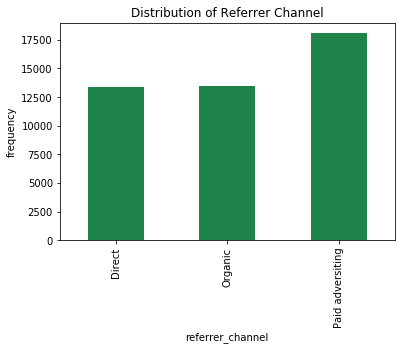

In [10]:
## Visualize referrer_channel
fig=plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.set_title("Distribution of Referrer Channel")
ax.set_ylabel("frequency")
ax.set_xlabel("Referrer Channel")
df.groupby('referrer_channel')['user_id'].count().plot(kind='bar',color="#1E8449", ax=ax)

**Explanation**:  
paid adversiting has the highest numbers of occurence in the discribution, therefore, the nulls will be replaced with paid adversiting.

##### **3.2.1. Imputation**

In [11]:
df['referrer_channel']=df['referrer_channel'].apply(lambda value:"Paid adversiting" if value is None else value)
UniqueContent(df, 'referrer_channel')

"The contents of referrer_channel variable are ['Organic', 'Direct', 'Paid adversiting']"

#### **3.3. Check for Duplicate**
I assume that user_id variable observations are unique. In this scenario, I do believe a user can either subscribed or unsubscribed, not both.  
If this assumption is true, then every datapoint in the dataset is unique.

In [12]:
# Check if user_id variable is not duplicated
print("Is any duplicate in user_id variable?:", df['user_id'].duplicated().sum()>0)

Is any duplicate in user_id variable?: False


#### **3.4. Class Distribution**
It is important to see if the response/target variable which is a 2-class is well distributed to avoid imbalance class.  
I decide to use visualization bar chart to see if the variable is distributed to the needs of this task.  

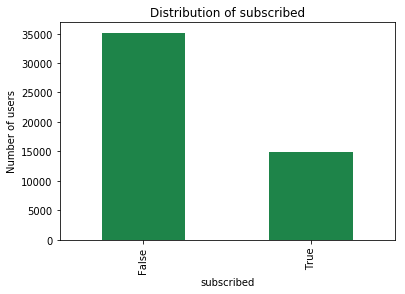

In [13]:
###Apply visualization to see size of the classes
fig=plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.set_title("Distribution of subscribed")
ax.set_ylabel("Number of users")
ax.set_xlabel("Subscribed")
df.groupby('subscribed')['user_id'].count().plot(kind='bar',color="#1E8449", ax=ax)

**Explanation**:  
Obviously, there is a problem of imbalance class with the dataset which should be fixed before any model could be built.   
In meantime, I will visualize/ explore  features base on the class.

#### **3.5. Data Exploration - Features** 
Visualing how the features behave as related to response/target variable

None
None
None
None
None
None
Axes(0.125,0.125;0.336957x0.725)
Axes(0.563043,0.125;0.336957x0.725)
Axes(0.125,0.125;0.336957x0.725)
Axes(0.563043,0.125;0.336957x0.725)


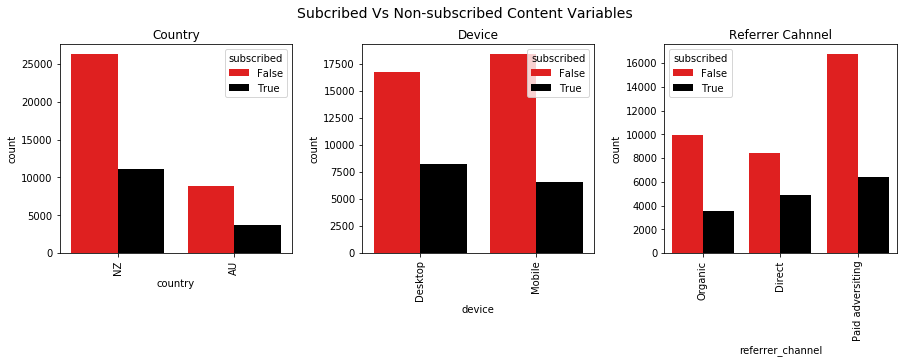

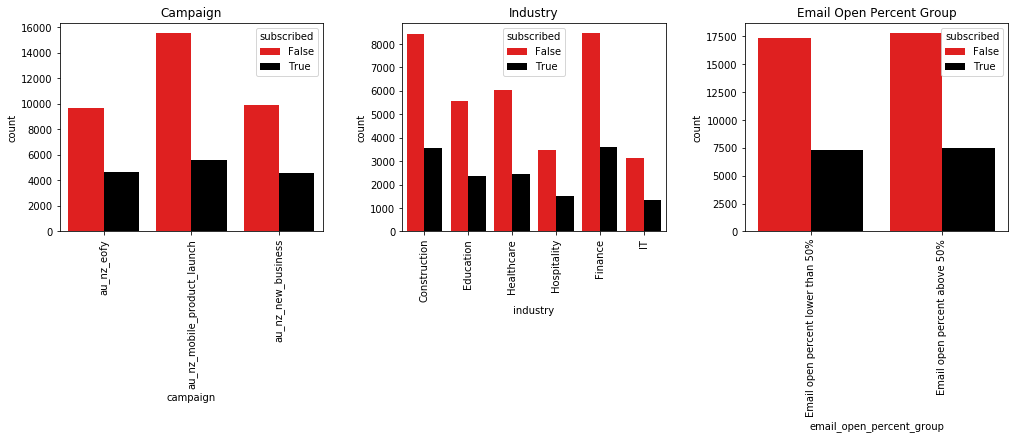

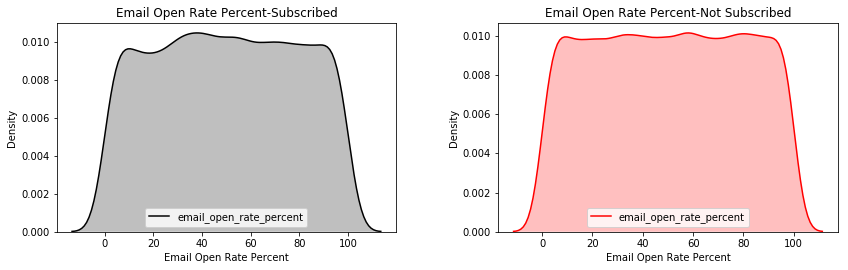

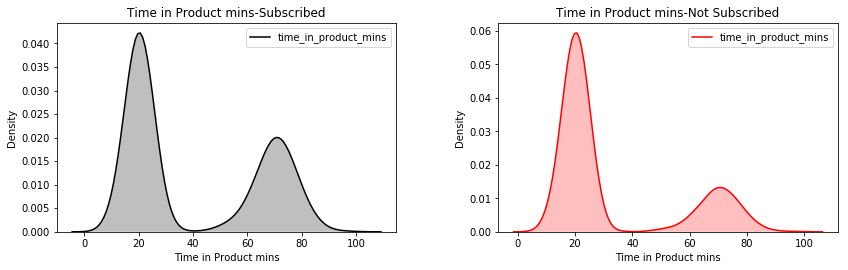

In [39]:
def FeatureVisualizer(df, fig, *argv):
    param = [arg for arg in argv]
    ax = fig.add_subplot(param[0],param[1],param[2])
    ax.set_title(param[3])
    ax.set_ylabel(param[4])
    sns.countplot(x=param[5], hue="subscribed", data=df, palette={False: "#FF0000", True: "#000000"}, ax=ax)
    for tick in ax.get_xticklabels():
         tick.set_rotation(90)

def FeatureVisualizer2(df, fig, *argv):
    param = [arg for arg in argv]
    ax = fig.add_subplot(param[0],param[1],param[2])
    ax.set_title("-".join([param[3],param[4]]))
    ax.set_xlabel(param[3])
    ax.set_ylabel('Density')
    return sns.kdeplot(df[df['subscribed']==param[5]][param[6]], ax=ax, shade=True, color=param[7])

    
fig = plt.figure(figsize=(15,4))
title = fig.suptitle("Subcribed Vs Non-subscribed Content Variables", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

print(FeatureVisualizer(df, fig, 1,3,1,"Country","Frequency","country"))
print(FeatureVisualizer(df, fig, 1,3,2,"Device","Frequency","device"))
print(FeatureVisualizer(df, fig, 1,3,3,"Referrer Cahnnel","Frequency","referrer_channel"))

fig = plt.figure(figsize=(17,4))
#title = fig.suptitle("Subcribed Vs Non-subscribed Content Variables", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

print(FeatureVisualizer(df, fig, 1,3,1,"Campaign","Frequency","campaign"))
print(FeatureVisualizer(df, fig, 1,3,2,"Industry","Frequency","industry"))
print(FeatureVisualizer(df, fig, 1,3,3,"Email Open Percent Group","Frequency","email_open_percent_group"))

# facets with density plots
fig = plt.figure(figsize = (14, 4))
#title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

print(FeatureVisualizer2(df,fig, 1,2,1,"Email Open Rate Percent","Subscribed",True,'email_open_rate_percent',"#000000"))
print(FeatureVisualizer2(df,fig, 1,2,2,"Email Open Rate Percent","Not Subscribed",False,'email_open_rate_percent',"#FF0000"))

# facets with density plots
fig = plt.figure(figsize = (14, 4))
#title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

print(FeatureVisualizer2(df,fig, 1,2,1,"Time in Product mins","Subscribed",True,'time_in_product_mins',"#000000"))
print(FeatureVisualizer2(df,fig, 1,2,2,"Time in Product mins","Not Subscribed",False,'time_in_product_mins',"#FF0000"))

**Explanation**:  
* As shown in the charts, NZ is high in non-subscribed and subscribed as compared to AU in the Country chart. With Device, more subscribed with Desktop  
than those who subscribed with mobile. However, more non-subscribed with Mobile than Desktop. As for campaign, au_nz_mobile_product_launch has highest   
for both subscribed and non-subscribed. As for the referrer channel, non-subscribed has lowest through Direct while subscribed through Organic has lowest.  
As for the industry, Construction and Finance are highest for both subscribed and non-subscribed.   
* Meanwhile, email open percent rate has unimodal for both subscribed and non-subscribed with flat distribution called uniform distribution. Uniform distribution   
is a symmetric probability distribution whereby every number of the  values  is equally likely to be observed; every one of n values has equal probability 1/n.
* Time spent on the product has bimodal distribution for both subscribed and non-subscribed which means two values occur frequently (two peaks). The bimodality is   
not due to an underlying deterministic model, but due to a mixture of probability models. In this case, each of the modes appears to have a bell-shaped component.     
One could easily imagine the charts are being generated by a process consisting of two normal distributions with the different standard deviations and two different locations.  
The recommended step needed to understand this bimodality is to either fit the normal mixture model using least square or maximum likehood which I will consider if this variable find  
to be important.

#### **3.6. Data Exploration - Time Series**
Importance of time cannot be neglected in this analysis. The seasonality could contribute to why users subscribe or not.  
In this scenario:  
    1. Seasonality could mean: day of the week, hour of the day, etc that users subscribed.
    2. Does seasonality affects subscribe or not subscribe differently or not?
Create Dataframe that will include new variables such as  weekday and hour.

In [40]:
def TimeDf(df, *argv):
    '''
    TimeDf function creates dataframe with ability to select variables to be included in the dataframe.
    The function is used purposely to extract weekday and hour as variables from timestamp
    weekday -> day of the week
           0 -  Monday
           1 - Tuesday
           2 - Wednesday
           3 - Thursday
           4 - Friday
           5 - Saturday
           6 - Sunday
    >>TimeDf(df, 'user_id', 'event_date','date', 'subscribed').head(3)
    	user_id                             	event_date	              date	subscribed	weekday	hour
     0	e7a484c4-6a87-44b8-a4d4-87f0cba58f18	2017-07-23 04:46:53.433953	2017-07-23	False	6	4
     1	5c6d1410-6e36-4cf0-bef1-ffc150e3127b	2017-07-12 12:56:59.982910	2017-07-12	False	2	12
     2	71207879-645a-4e41-bd46-133ba26524bf	2017-07-21 16:51:50.866545	2017-07-21	False	4	1
    '''
    col = [arg for arg in argv]
    timeDf= df[col]
    #timeDf['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
    timeDf['weekday']=timeDf[col[1]].dt.dayofweek
    timeDf['hour']=timeDf[col[1]].dt.hour
    return timeDf
timeDf = TimeDf(df, 'user_id', 'event_date','date', 'subscribed')
timeDf.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,user_id,event_date,date,subscribed,weekday,hour
0,e7a484c4-6a87-44b8-a4d4-87f0cba58f18,2017-07-23 04:46:53.433953,2017-07-23,False,6,4
1,5c6d1410-6e36-4cf0-bef1-ffc150e3127b,2017-07-12 12:56:59.982910,2017-07-12,False,2,12
2,71207879-645a-4e41-bd46-133ba26524bf,2017-07-21 16:51:50.866545,2017-07-21,False,4,16
3,41219462-d4c1-4c94-ac21-7b7846298de5,2017-07-08 21:53:13.940203,2017-07-08,False,5,21
4,2eb9a1fe-58e4-4793-8e73-91595d52dacf,2017-08-09 14:23:23.109747,2017-08-09,False,2,14


**Explanation:**  
I created timeDf using TimeDf function. I will need to group the dataframe by date, weekday, subscribed and count occurence of user_id by the elements of the group.    
 The mapping for weekday:
   *  0 -  Monday
   *  1 - Tuesday
   *  2 - Wednesday
   *  3 - Thursday
   *  4 - Friday
   *  5 - Saturday
   *  6 - Sunday  
   
And also, I need to reset the group into dataframe for the purpose of this task.

In [42]:
timeGroupDf = timeDf.groupby(['date','weekday', 'hour', 'subscribed'])['user_id'].count().reset_index().rename(columns={'user_id':'userCount'})
timeGroupDf.head()

,date,weekday,hour,subscribed,userCount
0,2017-06-30,4,0,True,1
1,2017-06-30,4,1,False,1
2,2017-06-30,4,5,False,1
3,2017-06-30,4,5,True,1
4,2017-06-30,4,6,False,2


The better way to see how users behave on different seasons is to visualize number of users against different seasonlity available and    
see how number of users who subscribed against those who did not subscribe.

Axes(0.125,0.125;0.775x0.725)
Axes(0.125,0.125;0.775x0.725)
Axes(0.125,0.125;0.775x0.725)


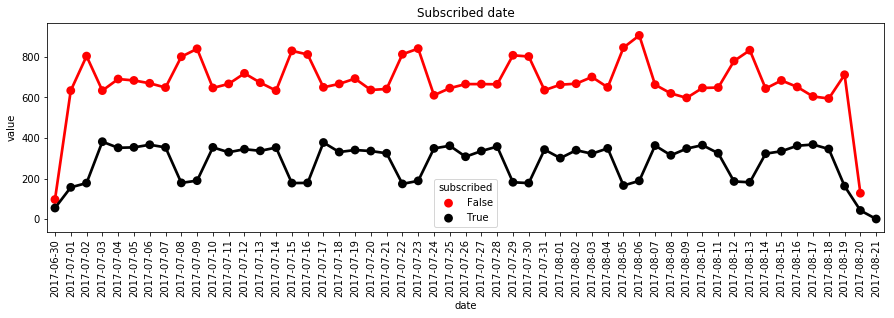

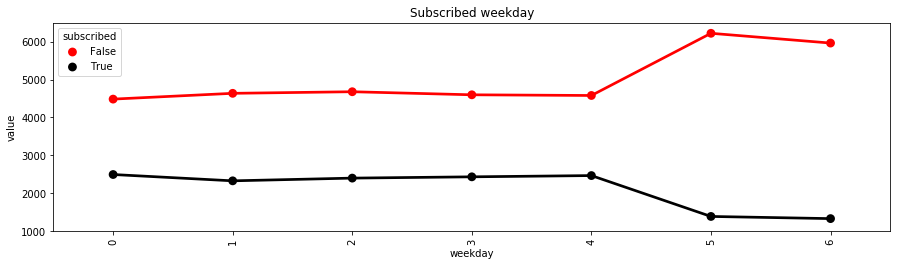

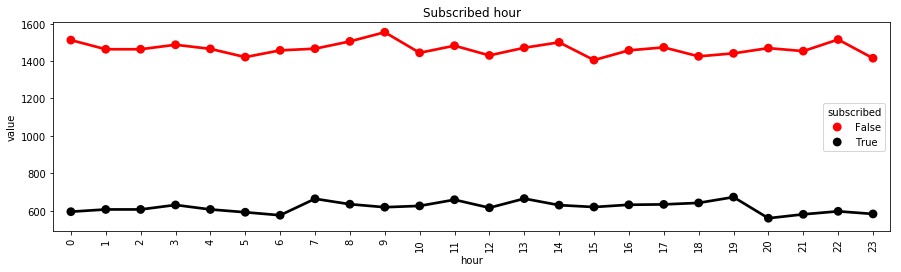

In [43]:
def SeasonVisualizer(df,season, subscribed, value):
    '''
    SeasonVisualizer function prints number of users over seasons selected
    Season could be hour, weekday and date
    '''
    timeDf= df.groupby([season, subscribed])[value].sum().reset_index().rename(columns={value:'value'})
    fig, ax = plt.subplots(figsize=(15,4))
    fig.subplots_adjust(top=0.85, wspace=0.3)
    plt.xticks(rotation=90)
    ax.set_title("Subscribed"+" "+season)
    ax.set_xlabel("Date")
    ax.set_ylabel("Number of Users") 
    return sns.pointplot(x=season, y='value', hue=subscribed, palette={False: "#FF0000", True: "#000000"}, ax=ax,data=timeDf)   
    
print(SeasonVisualizer(timeGroupDf, 'date', 'subscribed', 'userCount'))
print(SeasonVisualizer(timeGroupDf, 'weekday', 'subscribed', 'userCount'))
print(SeasonVisualizer(timeGroupDf, 'hour', 'subscribed', 'userCount'))

**Explanation**:  
**Chart 1: Subscribed Date**: The chart indicated something different from expected(If number of non subscribed goes then subscribed should go up) as regards to users who subscribed and those who do not subscribed.   
As we can see, anytime number of users who did not subscribe went up the number of users who subscribed went down. This happened on 8th & 9th of july,15th & 16th of July, 22nd & 23rd of July, 29th & 30th of July and 12th & 13th of August.     
What is interesting about about these dates is that they are weekends. It is hard to conclude at this stage that weekend contributes to increase of number of users do not subscribe. And if so, the question is why?  
Next chart will confirm if number of users who subscribed on weekend are lower than working days whereas those who did not subscribe higher on weekend than the working days.  

**Chart 2: Subscribed Weekday**: As we see, from Moday to Friday, number of users who chose to subscribe or those who chose not to are directly proportional. In other words,   
the lines are parallel. However, Saturday to Sunday, users who subscribed and those who failed to subscribed are wide apart. Therefore, can we say weekend contributes significantly?   Still a question!

**Chart 2: Subscribed Hour**: As shown in this chart, hour does not seem it has anything to do with users subscribed or not. The lines looked pretty almost the same.

Although the pattern in the chart 1 & 2 indicate clearly that weekend events are unsual, it is hard to establish this is true. This could be due to randomness or noise.
To establish that this is not due to randomness, I need to develop hypothesis and test it.

##### **3.6.1. Hypothesis Testing**
**3.6.1.1. Specify the Null and the Alternate hypothesis**  
It is important to classify the dataset into subscribed and non subscribed classes before applying inferential statistics since the classes are imbalance.  
Therefore, the hypothesis testing applying to subscribed cluster separated from non-subscribed Cluster.  

**Cluster 1:**   
*Null Hypothesis*: There is no significant different between number of users who do not subscribe on working days and those who do not subscribed on weekend.  
*Alternate Hypothesis*: Number of users who do not subscribe are higher on weekend than those who do not subscribed on working days.

**Cluster 2:**   
*Null Hypothesis*: There is no significant different between number of users who do subscribe on working days and those who do subscribed on weekend  
*Alternate Hypothesis*: Number of users who do subscribe are lower on weekend than those who do subscribed on working days.

**3.6.2.1. Choose a Sample**  
It will be unfair in the analysis to use all the dataset for the working days which are five days a week compare to weekend which is two days a week. Since, I can identify  
12 days from the chart that constitutes all the weekends, I have to randomly select 12 days from working days that could represent all the working days. To reduce bias that  
could come from my choice of collecting sample, I may have to choose from week prior to weekend.

In [48]:

def FilterNClassifiedDateDf(df, date, weekday,value, subscribed, check, *argv):
    '''
    FilterNClassifiedDatedDf function allows select right dates from the dataset and classify the selected dates into working days and weekends.
    df -> dataframe
    date -> column in df
    weekday -> column in df
    wkend -> list variable
    check -> either True or False
    subscribed -> column in df
    argv -> list of variables
    >> FilterNClassifiedDateDf(timeGroupDf, 'date', weekday, 'userCount','subscribed',False, argv)
    '''
    df = df[df[subscribed]==check]
    df[date] = df[date].astype('str')
    dt = [arg for arg in argv]
    df =df[~((df[date]==dt[0]) | (df[date]==dt[1]) | (df[date]==dt[2]) | (df[date]==dt[3]) | (df[date]==dt[4]) | (df[date]==dt[5]))]
    df['dayofweek'] = df[weekday].apply(lambda value: 'weekend' if value >= 5 else 'working days')
    return df[[date,'dayofweek',value]].reset_index(drop=True)

def ApplySamplingDf(df,date, dates):
    '''
    df -> dataframe
    date -> column in df
    dates -> list of dates
    ApplySampling function is used to select number of date needed 
    '''
    df= df[(df[date]==dates[0]) |
           (df[date]==dates[1]) |
           (df[date]==dates[2]) |
           (df[date]==dates[3]) |
           (df[date]==dates[4]) |
           (df[date]==dates[5]) |
           (df[date]==dates[6]) |
           (df[date]==dates[7]) |
           (df[date]==dates[8]) |
           (df[date]==dates[9]) |
           (df[date]==dates[10]) |
           (df[date]==dates[11])]
    return df

**3.6.1.2. Assess the Evidence**  
* Identify and separate weekend dates into variable. And also create matrix to contain working days per week.
* There are identified 12 days of weekends and 6 weeks of working days as shown in the above chart 1.
* Trying to establish if there is an actually relationship between season of the week (working days and weekends) and number of users who do not subscribed.
* The statistical tool for this model is Analysis of variance(ANOVA).
* Finding a probality-value (p-value) less than or equal to 0.05 means that the finding is statistically significant then I can accept the alternate hypothesis.

**3.6.2.1.1. Cluster1: Involves users who do not subscribe**

In [50]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
from random import sample, seed
seed(100)


#kCreate new dataset
## Create list of  weekend dates and a matrix for weekdays. 
weekend = ['2017-07-08', '2017-07-09', '2017-07-15', '2017-07-16', '2017-07-22','2017-07-23','2017-07-29','2017-07-30', '2017-08-05','2017-08-06', '2017-08-12',
           '2017-08-13']
workingdays = [['2017-07-03','2017-07-04','2017-07-05','2017-07-06','2017-07-07'],
              ['2017-07-10','2017-07-11','2017-07-12','2017-07-13,','2017-07-14'],
              ['2017-07-17','2017-07-18','2017-07-19','2017-07-20','2017-07-21'],
              ['2017-07-24','2017-07-25','2017-07-26','2017-07-27','2017-07-28'],
              ['2017-07-31','2017-08-01','2017-08-02','2017-08-03','2017-08-04'],
              ['2017-08-07','2017-08-08','2017-08-09','2017-08-10','2017-08-11']]

# Need to select two days at random from each week in the martix (workingdays). The idea is to have two working days against two days weekend for the hypothesis
# Expect to have 12 working days in the list 
workingDaysList = [date for weekday in workingdays for date in sample(weekday ,2)]

#I dentify 6 dates that are not relevant to my analysis in the dataframe, timeGroupDf. Therefore I remove them through FilterNClassifiedDateDf function
nonSubDf = FilterNClassifiedDateDf(timeGroupDf, 'date', 'weekday', 'userCount','subscribed',False,'2017-06-30','2017-07-01','2017-07-02','2017-08-19','2017-08-20','2017-08-21')

#Create dataframe for working days that are ramdonly selected, which total of 12 days
workingDayNonSubDf = ApplySamplingDf(nonSubDf, 'date', workingDaysList)

#Create dataframe for identify weekend days 
weekendNonSubDf = ApplySamplingDf(nonSubDf, 'date',weekend)

# Concat workingDayNonSubDf and weekendNonSubDf
resultDf =pd.concat([workingDayNonSubDf,weekendNonSubDf],axis=0)

# Formating userCount variable in the resultDf
resultDf['userCount']=pd.to_numeric(resultDf['userCount'])

# To calculate the analysis of variance F-statistic and associated p-value, we're going to use the Ordinary Lease Squares, or OLS function. 
# This function is part of the stats models formula API package. 
model = smf.ols(formula='userCount ~ C(dayofweek)', data=resultDf)
results = model.fit()

# I need to explicitly ask Phyton to print these results. Here, I'm requesting results1 with the summary function.
print(results.summary())
print('========================================================================================== ')
resultDf2 = resultDf[['dayofweek', 'userCount']].dropna()

print ('means for working days and weekend  by users who do not subscribe')
mean= resultDf2.groupby('dayofweek').mean()
print (mean)
print("==========================================================================================")
print ('standard deviations for weekday and weekend by by users who do not subscribe')
sd = resultDf2.groupby('dayofweek').std()
print (sd)

                            OLS Regression Results                            
Dep. Variable:              userCount   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     220.4
Date:                Sat, 24 Mar 2018   Prob (F-statistic):           3.59e-42
Time:                        13:32:20   Log-Likelihood:                -1728.7
No. Observations:                 552   AIC:                             3461.
Df Residuals:                     550   BIC:                             3470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


   **Explanation**:  
The OLS output has generated a number of model estimates, including the F-statistic and associated p-value. The calculated F-statistic is 220.4,  
and the p or probability value for this F-statistic is 3.59e-42. To interpret a significant association, look at the means table.  
Since p is less than .05, I can say that the number of users who did not subscribe are higher on weekend than those who did not subscribe on working day.    
Therefore, I reject null hypothesis.

**3.6.2.1.2. Cluster2 Involves users who subscribed**

In [51]:
#I dentify 6 dates that are not relevant to my analysis in the dataframe, timeGroupDf. Therefore I remove them through FilterNClassifiedDateDf function
subDf = FilterNClassifiedDateDf(timeGroupDf, 'date', 'weekday', 'userCount','subscribed',True,'2017-06-30','2017-07-01','2017-07-02','2017-08-19','2017-08-20','2017-08-21')

#Create dataframe for working days that are ramdonly selected, which total of 12 days
workingDaySubDf = ApplySamplingDf(subDf, 'date', workingDaysList)

#Create dataframe for identify weekend days 
weekendSubDf = ApplySamplingDf(subDf, 'date',weekend)

# Concat workingDayNonSubDf and weekendNonSubDf
resultSubDf =pd.concat([workingDaySubDf,weekendSubDf],axis=0)

# Formating userCount variable in the resultDf
resultSubDf['userCount']=pd.to_numeric(resultSubDf['userCount'])

# To calculate the analysis of variance F-statistic and associated p-value, we're going to use the Ordinary Lease Squares, or OLS function. 
# This function is part of the stats models formula API package. 
modelSub = smf.ols(formula='userCount ~ C(dayofweek)', data=resultSubDf)
resultSub = modelSub.fit()

# I need to explicitly ask Phyton to print these results. Here, I'm requesting results1 with the summary function.
print(resultSub.summary())

resultSubDf2 = resultSubDf[['dayofweek', 'userCount']].dropna()
print('====================================================================================')
print ('means for weekday and weekned  by users who do not subscribe')
mean= resultSubDf2.groupby('dayofweek').mean()
print (mean)
print('====================================================================================')
print ('standard deviations for weekday and weekend by by users who do not subscribe')
sd = resultSubDf2.groupby('dayofweek').std()
print (sd)

                            OLS Regression Results                            
Dep. Variable:              userCount   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     656.7
Date:                Sat, 24 Mar 2018   Prob (F-statistic):           6.60e-96
Time:                        16:52:00   Log-Likelihood:                -1422.9
No. Observations:                 552   AIC:                             2850.
Df Residuals:                     550   BIC:                             2858.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


**Explanation**:  
The calculated F-statistic is 656.7 and the p or probability value for this F-statistic is 6.60e-96. To interpret the significant association,   
since p is less than .05, I can see that the number of users who subscribed are lower on weekend than those who subscribed on weekday.      
Therefore, I reject null hypothesis.

### **4. Features Engineering**
I will select features I believe are relevent to the model I am proposing for this task. Since I have established weekend as important subset of date,   
there is no need to include it and so also user_id, email_open_percenT_rate_group and country will be dropped.  
The aim of building feature selection model is to find quicker ways to identfiy features in the dataset that could influence users' decision to subscribe or not.

In [52]:
## Select features and create them into dataframe
modelFeatureDf = df.drop(['user_id','event_date', 'date', 'email_open_percent_group','country'], axis=1)
print(modelFeatureDf.dtypes)
modelFeatureDf.head()

subscribed                    bool
device                      object
email_open_rate_percent    float64
referrer_channel            object
campaign                    object
industry                    object
time_in_product_mins       float64
dtype: object


,subscribed,device,email_open_rate_percent,referrer_channel,campaign,industry,time_in_product_mins
0,False,Desktop,14.0,Organic,au_nz_eofy,Construction,62.45
1,False,Mobile,23.0,Direct,au_nz_mobile_product_launch,Education,19.35
2,False,Mobile,97.0,Paid adversiting,au_nz_mobile_product_launch,Education,76.48
3,False,Mobile,57.0,Paid adversiting,au_nz_mobile_product_launch,Construction,22.53
4,False,Mobile,83.0,Direct,au_nz_mobile_product_launch,Construction,24.50


#### **4.1. Encode the Variables**
To be able to use these variables, there is a need to  one-hot encode the categorical features in the dataset as binary variables. 

In [53]:
encodedDf =pd.get_dummies(modelFeatureDf)

In [54]:
print(encodedDf.dtypes)
encodedDf.head()

subscribed                                 bool
email_open_rate_percent                 float64
time_in_product_mins                    float64
device_Desktop                            uint8
device_Mobile                             uint8
referrer_channel_Direct                   uint8
referrer_channel_Organic                  uint8
referrer_channel_Paid adversiting         uint8
campaign_au_nz_eofy                       uint8
campaign_au_nz_mobile_product_launch      uint8
campaign_au_nz_new_business               uint8
industry_Construction                     uint8
industry_Education                        uint8
industry_Finance                          uint8
industry_Healthcare                       uint8
industry_Hospitality                      uint8
industry_IT                               uint8
dtype: object


,subscribed,email_open_rate_percent,time_in_product_mins,device_Desktop,device_Mobile,referrer_channel_Direct,referrer_channel_Organic,referrer_channel_Paid adversiting,campaign_au_nz_eofy,campaign_au_nz_mobile_product_launch,campaign_au_nz_new_business,industry_Construction,industry_Education,industry_Finance,industry_Healthcare,industry_Hospitality,industry_IT
0,False,14.0,62.45,1,0,0,1,0,1,0,0,1,0,0,0,0,0
1,False,23.0,19.35,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,False,97.0,76.48,0,1,0,0,1,0,1,0,0,1,0,0,0,0
3,False,57.0,22.53,0,1,0,0,1,0,1,0,1,0,0,0,0,0
4,False,83.0,24.50,0,1,1,0,0,0,1,0,1,0,0,0,0,0


#### **4.2. Correct Imbalance Class Distribution**
As mentioned early, there is a need to correct the imbalance class before using dataset for train a model

In [55]:
encodedDf['subscribed'].value_counts()

False    35173
True     14827
Name: subscribed, dtype: int64

**Explanation**:  
Imbalanced data typically refers to a problem with classification where the classes are not represented equally.   
In this case, it seems that unsubscribed to subscribed is almost ratio of 3:1 which would have negative effect on model we will use the date to bulid.   
Classification of data with imbalanced class distribution has posed a significant drawback of the performance attainable by most standard classifier learning algorithms,     
which assume a relatively balanced class distribution and equal misclassification costs.  

There are many ways to solve this issue. Some of the way include: 
1. Collect more data,
2. Change performance metrics,
3. Resampling the data
4. Generate synthesis samples.  

There is no way to collect more data. The only option I can apply is generate synthesis samples using Synthetic Minority Oversampling Technique (SMOTE)     
and Adaptive Synthetic (ADASYN) sampling method. 

##### **4.2.1. Use SMOTE Algorithm**
At a high level, SMOTE creates synthetic observations of the minority class (subscribed) by:  
 * Finding the k-nearest-neighbors for minority class observations (finding similar observations)
 * Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

In [56]:
from imblearn.over_sampling import SMOTE
from collections import Counter
Y = encodedDf['subscribed']
X = encodedDf.drop('subscribed', axis=1)

X_resampled, Y_resampled = SMOTE().fit_sample(X,Y)
sorted(Counter(Y_resampled).items())

[(False, 35173), (True, 35173)]

### **5. Modelling: Feature Selection**
One of key purposes of this  analysis to train a classifer or model that could identify important features that influence users who subscribe or not.  
The most common machine leaarning algorithms for this task include:
    1. Baseline Modeling - Random Forest 
    2. Selection Modeling - SelectKBest
    3. Recursive feature elimination (RFE) with Extreme Random forest
    4. Tree based feature selection and Extreme Random Forest classification
    5. Recursive feature elimination with cross validation and Random forest classification
   
* Extra Tree Classifier is an ensambles of decision trees can be used to compute the relative importance of each attribute. These important attributes  
can be used to inform a feature selection process.
* Recursive Feature Elimination method is a feature selection approach.   
It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify   
which attributes (and combination of attributes) contribute the most to predicting the target attribute. Extra tree classifer will be used   
as baseline modelling method while Recursive Feature Elimination. Since the requirement of this task is not to build a predictive model,   
but to train models to identify important features in the datset.

#### **5.1. Baseline Modeling - Random Forest**
I wil use Random forest to build a classifer and check the accurracy of the classifier. End goal of this exercise is to identify important features, not predictive model.  
Therefore, no effort will spend on improving accuracy of model performance.

Accuracy is:  0.7374431387414708


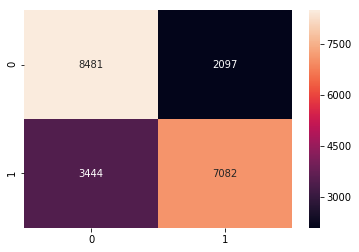

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

feature_names = list(encodedDf.columns)[1:]
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
forestClassifier = RandomForestClassifier(random_state=43)      
clr_rf = forestClassifier.fit(x_train,y_train)
y_pred = forestClassifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy is: ',accuracy)
cmap = confusion_matrix(y_test,y_pred)
sns.heatmap(cmap,annot=True,fmt="d")

**Explanation**:  
Accuracy is little over 70% and as it can be seen in confusion matrix, we make more wrong prediction. 

#### **5.2. Selection Modeling - SelectKBest**
SelectKBest will be used to rank importance of the features in a natural way. Basically, SelectKBest removes all but the k highest scoring features.

Score list: [1.47812959e+00 1.93580284e+04 1.73911797e+02 1.88619836e+02
 3.43588109e+02 1.33670820e+02 3.54115766e+01 5.58027988e+01
 1.31358348e+02 3.63725540e+01 3.20607839e+00 4.06335880e-01
 8.19733187e-02 5.51375929e+00 7.97773628e-01 4.23731101e+00]


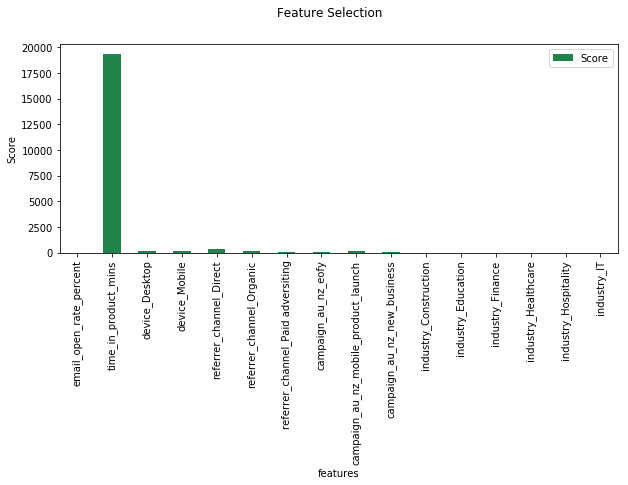

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)

fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Feature Selection", fontsize=12)
fig.subplots_adjust(top=0.85,wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("feature_names")
ax.set_ylabel("Score")
pd.DataFrame({'features':feature_names, 'Score':select_feature.scores_}).set_index('features').plot(kind='bar', color="#1E8449", ax=ax)

**Explanation**:  
As we can see, the features with higher values are the best based on this model. 

So 1ets see what happens if I use only these best scored 5 feature.

Accuracy is:  0.6259476876421531


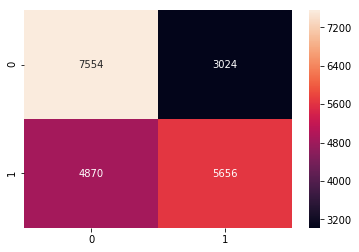

In [61]:
x_train_1 = select_feature.transform(x_train)
x_test_1 = select_feature.transform(x_test)

#random forest classifier with n_estimators=10 (default)
forestClassifier2 = RandomForestClassifier()      
clr_rf = forestClassifier2.fit(x_train_1,y_train)
y_pred_1 = forestClassifier2.predict(x_test_1)
accuracy_1 = accuracy_score(y_test,y_pred_1)
print('Accuracy is: ',accuracy_1)
cmap = confusion_matrix(y_test,y_pred_1)
sns.heatmap(cmap,annot=True,fmt="d")

**Explanation**:  
Accuracy is over 62% and as it can be seen in confusion matrix. The impact of this 5 features performance is lower compared to baseline model. However, prediction is not aim of this exercise but feature selection.   
What I did up to now is that I chose features according to the selectkBest method. Now lets see other feature selection methods to find better results.

#### **5.3. Recursive feature elimination (RFE) with Random forest**
Basically, I will use one of the classification methods (random forest in this task), assign weights to each of features whose absolute weights with the smallest are pruned   
from the current set features. This procedure is recursively repeated using RTE on the pruned set until the desired number of features.

In [62]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
def SelectFeatureModel(clf, fMethod,x_train, y_train,feature_names, nf, step):
    '''
    clf -> classifier
    fMethod -> Recursive method
    x_train -> Trainingset
    y_train -> Trainingset
    feature_names -> column names
    nf -> number of selected features
    step -> iteration step
    '''

    fm = fMethod(estimator=clf, n_features_to_select=nf, step=step)
    fm = fm.fit(x_train, y_train)
    print('Optimal number of features :', fm.n_features_)
    print(' ')
    dt = {feature_names[i]:fm.support_[i] for i in range(len(feature_names))}
    print('Chosen best', fm.n_features_, 'features by RFE:')
    for index, row in enumerate(dt.keys()):
        if dt[row]==True:
            print('feature',index,":", row)
            
# Selected 8 Festures
SelectFeatureModel(RandomForestClassifier(), RFE,x_train, y_train,feature_names, 8, 1)

Optimal number of features : 8
 
Chosen best 8 features by RFE:
feature 0 : email_open_rate_percent
feature 1 : time_in_product_mins
feature 4 : referrer_channel_Direct
feature 5 : referrer_channel_Organic
feature 7 : campaign_au_nz_eofy
feature 10 : industry_Construction
feature 12 : industry_Finance
feature 13 : industry_Healthcare


**Explanation**:  
The features are different compared with previous (selectkBest) method except  time_in_product_mins.  
There may be a need to calculate accuracy again so that we make good feature selection with rfe than selectkBest methods.

#### **5.4. Tree based feature selection and Extreme Random Forest classification**
I will use ensemble method to compute feature importances by selecting the most important features from a number of randomized decision trees.

feature ranking:
1. feature 1 (0.392074)
2. feature 0 (0.292132)
3. feature 12 (0.035131)
4. feature 10 (0.034883)
5. feature 4 (0.034827)
6. feature 6 (0.029337)
7. feature 13 (0.028966)
8. feature 5 (0.028431)
9. feature 11 (0.027222)
10. feature 14 (0.017819)
11. feature 15 (0.017190)
12. feature 7 (0.015716)
13. feature 9 (0.014934)
14. feature 3 (0.011056)
15. feature 2 (0.010820)
16. feature 8 (0.009462)


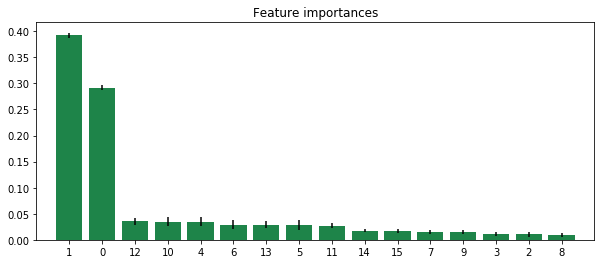

In [63]:
### Baseline Modelling
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

#Define the classifier
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(x_train,y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("feature ranking:")

for f in range(x_train.shape[1]):
     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10,4))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="#1E8449", yerr=std[indices], align="center")
plt.xticks(range(X_resampled.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

**Explanation**:  
The first step in measuring the feature importance in the dataset is to fit a extra random forest to the data. During the fitting 
process, the out-of-bag error for each data point is recorded and averaged over the forest. To measure the importance of the 
feature after training, the values of the feature are permuted among the training data and the out-of-bag error is again computed 
on this perturbed data set. The importance score for the feature is computed by averaging the difference in out-of-bag error before and a
fter the permutation over all trees. The score is normalized by the standard deviation of these differences.

Features which produce large values for this score are ranked as more important than features which produce small values. 

In my case, as we can see in the chart above, importance of the features is rank top-down. The first two are: 
  * feature 1: time_in_product_mins  and   
  * feature 0: email_open_rate_percent     



#### **5.5. Recursive feature elimination with cross validation and Random forest classification**

Optimal number of features : 14
Chosen best feature by rfe: ['email_open_rate_percent', 'time_in_product_mins', 'device_Desktop', 'referrer_channel_Direct', 'referrer_channel_Organic', 'referrer_channel_Paid adversiting', 'campaign_au_nz_eofy', 'campaign_au_nz_new_business', 'industry_Construction', 'industry_Education', 'industry_Finance', 'industry_Healthcare', 'industry_Hospitality', 'industry_IT']


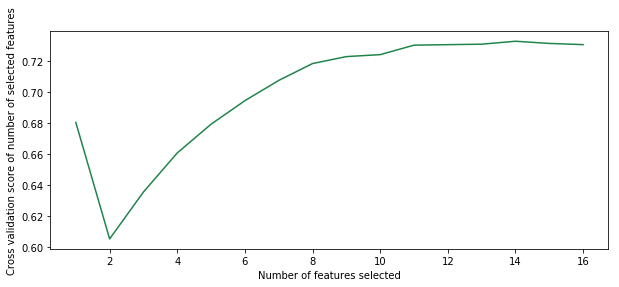

In [64]:
from sklearn.feature_selection import RFECV

def SelectFeatureModel2(clf, fMethod,x_train, y_train,feature_names, step, cv):
    '''
    cls -> classifier or estimator
    fMethod -> RFECV
    cv -> cross  validation
    feature_names -> list of columns
    '''

    # The "accuracy" scoring is proportional to the number of correct classifications
    fm = fMethod(estimator=clf, step=step, cv=cv, scoring='accuracy') #5-fold cross-validation
    fm = fm.fit(x_train, y_train)
    print('Optimal number of features :', fm.n_features_)
    dt = {feature_names[i]:fm.support_[i] for i in range(len(feature_names))}
    print('Chosen best feature by rfe:',[i for i in dt.keys() if dt[i]==True])
    plt.figure(figsize=(10,4))
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score of number of selected features")
    plt.plot(range(1, len(fm.grid_scores_) + 1), fm.grid_scores_, color="#1E8449")
    plt.show()

SelectFeatureModel2(RandomForestClassifier(), RFECV, x_train, y_train, feature_names, 1, 5)

**Explanation**:  
In this model email_open_rate_percent and time_in_product_mins are two features that strongly impact model performance. Although other features are important as well but not as the two
Keep in mind though that these measurements are made only after the model has been trained (and is depending) on all of these features. 

### 6. Recommendation and Conclusion
Every model in this exercise indicates that email_open_rate_percent and time_in_product_mins have significant impact to influence if users subscribe or not.  
In addition, referrer_channel_Paid adversiting and industry_Construction are top 8 in the three models. Meanwhile campaign_au_nz_eofy and campaign_au_nz_eofy are appeared in the first 2 models  
referrer_channel_Direct, referrer_channel_Organic and industry_finance are appeared in the last 2 models.

* At this point, I can conclude that number of users open campaign emails they recieve and time they spend  on the products contribute significantly to either they will subscribe or not.    
* Users from construction and finance industry are more likely to subscribe or not compare to other industries.
* Referrer channel through Paid adversiting could be significant than other referrer channels however, it is likely that most of the users come through Direct referrer channel.   

Further testing is needed to determine how subscribed users interact with these features before they subscribe, therefore we can establish the features influnce users' decisions to subscribe.  
since we have identified number of users who subscribed on weekend is lower than working days which we may think is normal assuming that our products are mostly used during working days. 

Based on assumption that our products are mostly used during working day, we expect number of users who do not subscribe should be lower on weekend than working days, on contrary, the numbers are higher on weekends.   
As part of further analysis, we need to understand industry those users who subscribed or not on weekend came from, device they use, referrer channel they came through.  
Finally, early part of analysis indicates that there are two groups in time_in_product_mins. It is important to see how the groups correlated with email_open_rate_percent and distributed across subcribed and non-subscribed:

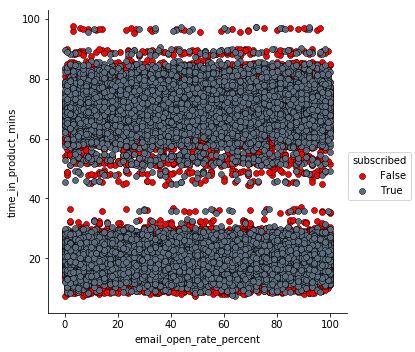

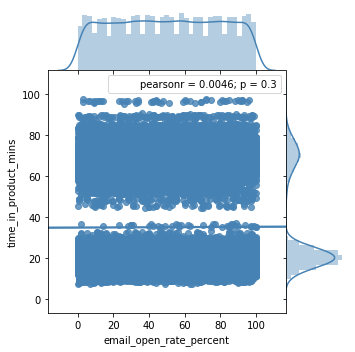

In [65]:
#fig=plt.figure(figsize=(6,4))
jp = sns.pairplot(df, x_vars=["email_open_rate_percent"], y_vars=["time_in_product_mins"], size=5,
                  hue="subscribed", palette={False: "#FF0000", True: "#5D6D7E"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))


#plt.scatter(x=df['email_open_rate_percent'], y=df['time_in_product_mins'],alpha=0.4, edgecolor='w')


sns.jointplot(x='email_open_rate_percent', y='time_in_product_mins', data=df, kind='reg', space=0, size=5, ratio=4, color="steelblue")

As we can see, time_in_product_mins separated into two and distributed evenly across email_open_rate_percent.

##### Reference
http://scikit-learn.org  
https://en.wikipedia.org/